### National Basketball Association

#### 2016 - 2017 season

In [72]:
import os,re
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [73]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [74]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [75]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [76]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [77]:
parseDate(dfNba).tail(50)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [ ]:
dfNba.tail(50)

### Change to date time index

In [78]:
dfNba["date"] = pd.to_datetime(dfNba["date"],format="%m/%d/%Y")
# dfNba["date"] = dfNba["date"].apply(pd.to_datetime(format="%m/%d/%Y"))
# dfNba.set_index("date",inplace=True)
# dfNba.dtypes
dfNba.head(15)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,2016-10-25,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,2016-10-25,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,2016-10-25,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,2016-10-26,Miami Heat,16,away,0,23,27,30,28,1

### Restrict target

In [79]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60)]

In [80]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [81]:
features = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 offense rank',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']

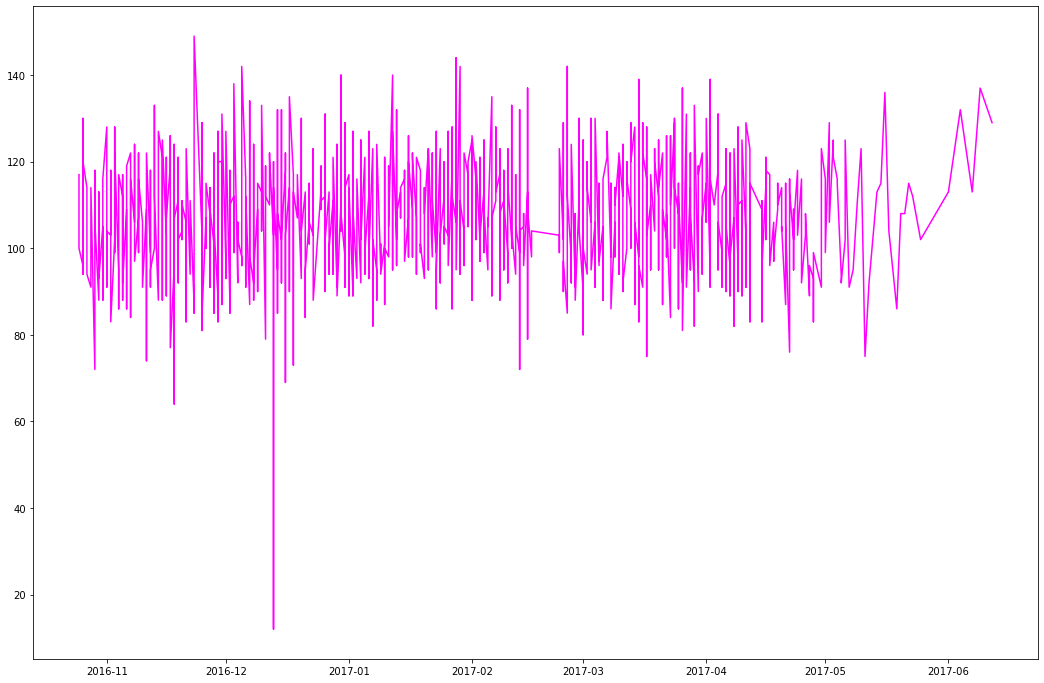

In [82]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.date,dfNba["team2 final score"],color="magenta")
plt.show()

In [83]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) \
    & (dfNba["team2 final score"] > 60)]

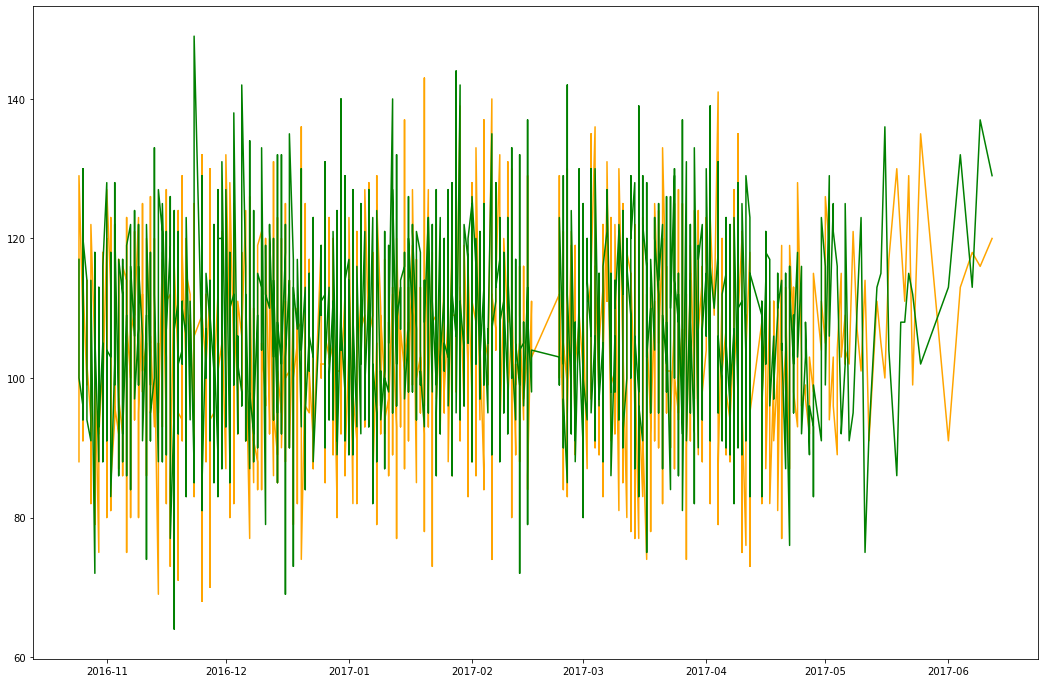

In [84]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.date,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.date,dfNbaScore["team2 final score"],color="green")
plt.show()

### Train, test, & split

#### Target team one final score

In [85]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

xTestCopy = xTest.copy(deep=True)

In [86]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [87]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [88]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [89]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,0
0,119.489487
1,98.608543
2,103.434952
3,113.140892
4,102.847130
5,105.166786
6,100.291580
7,89.710060
8,109.464684
9,107.655281


In [90]:
xTestCopy.reset_index(inplace=True)
xTestCopy.head(25)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 offense rank,team1 schedule rank number,team1 schedule rank decimal,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total
0,876,2.0,110,47.62,2.10,1.1000,43,15,26,6,1.47,31.7,10.6,100.3,100.2,99.5,-0.1,-7,8,-2.0,56.52,1.77,0.7692,40,42,11,0.15,9,1.39,112.65,2.81,16,0.84,3,34.6,87.7,111.2,111.7,108.3,110.3,0.5,6,-1.4,215.0,216.5
1,603,11.5,550,15.38,6.50,5.5000,53,29,24,27,0.37,33.3,9.8,107.6,101.1,100.2,-6.6,4,29,-11.5,88.89,1.12,0.1250,55,38,5,0.78,6,3.74,100.01,2.24,1,1.90,3,33.7,79.3,97.5,100.4,96.7,100.0,2.9,-26,1.1,194.0,194.5
2,446,4.5,165,37.74,2.65,1.6500,41,8,18,25,0.42,33.0,10.6,102.1,103.2,106.5,1.1,8,19,-4.5,64.91,1.54,0.5405,34,48,19,-0.36,20,-1.52,104.77,2.95,12,0.96,6,35.1,87.0,106.4,104.3,100.0,101.0,-2.1,3,-4.8,203.0,206.0
3,726,9.5,425,19.05,5.25,4.2500,39,13,14,9,1.27,34.2,12.2,106.2,106.5,109.7,0.2,-6,27,-9.5,84.62,1.18,0.1818,69,29,3,1.23,3,6.50,106.69,2.85,2,1.74,6,33.5,84.2,99.4,105.6,107.7,105.0,6.2,-14,4.9,210.0,210.0
4,551,6.0,220,31.25,3.20,2.2000,48,20,16,12,0.96,35.1,8.6,106.4,104.3,107.6,-2.1,3,2,-6.0,72.22,1.38,0.3846,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,214.5,212.5
5,280,0.0,-110,52.38,1.91,0.9091,53,29,24,27,0.37,33.3,9.8,107.6,101.1,100.2,-6.6,4,23,0.0,52.38,1.91,0.9091,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,196.0,198.5
6,168,5.0,175,36.36,2.75,1.7500,51,25,19,26,0.42,33.2,12.0,108.0,104.3,104.9,-3.7,1,30,-5.0,66.67,1.50,0.5000,56,39,8,0.47,12,0.68,109.45,3.61,30,0.24,5,32.5,87.1,107.5,109.0,99.3,107.8,1.6,-10,-2.5,205.5,208.5
7,1219,14.5,1100,8.33,12.00,11.0000,43,18,22,29,0.31,34.0,10.4,104.2,103.3,106.1,-0.9,-16,12,-14.5,96.15,1.04,0.0400,42,44,18,-0.34,11,0.83,105.79,3.01,20,0.59,2,32.8,84.7,105.7,105.3,109.0,103.6,-0.4,-4,-5.6,207.0,200.5
8,1176,5.0,180,35.71,2.80,1.8000,51,19,12,11,1.05,31.0,11.4,106.7,105.6,106.6,-1.1,-5,25,-5.0,67.74,1.48,0.4762,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,219.5,217.0
9,273,7.5,250,28.57,3.50,2.5000,44,11,13,20,0.59,32.8,9.2,105.7,105.3,107.0,-0.4,-4,25,-7.5,75.90,1.32,0.3175,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,215.0,209.0


In [91]:
xTestCopy["team1 final score predict"] = ""
for index,row in enumerate(range(0,len(xTestCopy),1)):
    # print(index)
    xTestCopy["team1 final score predict"].iloc[index] = pd.DataFrame(yPredict).iloc[index,0]
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [92]:
xTestCopy.tail(50)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 offense rank,team1 schedule rank number,team1 schedule rank decimal,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total,team1 final score predict
277,625,5.5,200,33.33,3.00,2.0000,45,14,8,4,1.55,33.6,10.1,109.0,107.6,109.8,-1.3,-25,4,-5.5,70.59,1.42,0.4167,36,46,21,-0.45,17,-1.06,104.34,2.87,22,0.48,5,34.8,85.4,104.7,104.9,89.7,103.2,0.2,-27,-2.8,216.5,217.5,95.456497
278,1193,17.0,1600,5.88,17.00,16.0000,48,20,16,12,0.96,35.1,8.6,106.4,104.3,107.6,-2.1,3,10,-17.0,98.36,1.02,0.0167,83,16,1,3.54,1,15.71,119.68,2.99,3,1.58,4,35.3,87.1,104.5,116.5,121.0,114.0,12.0,9,7.7,219.0,216.0,104.332283
279,80,-12.0,-1000,90.91,1.10,0.1000,36,2,2,5,1.52,34.1,9.3,107.4,111.4,113.4,4.0,-9,23,12.0,12.50,8.00,7.0000,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,204.5,210.0,97.405266
280,35,-11.5,-791,88.78,1.13,0.1264,16,1,1,3,1.58,35.3,9.4,104.5,116.5,118.9,12.0,9,24,11.5,14.93,6.70,5.7000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,225.0,227.0,109.167198
281,176,9.5,400,20.00,5.00,4.0000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,21,-9.5,83.33,1.20,0.2000,48,39,12,0.11,13,0.32,105.48,3.19,9,1.27,3,34.2,87.4,106.2,106.5,107.7,103.3,0.2,-6,-5.1,218.0,216.5,104.792473
282,29,8.0,280,26.32,3.80,2.8000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,17,-8.0,78.26,1.28,0.2778,44,44,16,-0.17,16,-0.70,100.77,2.73,21,0.53,2,31.5,81.6,103.1,102.9,86.0,100.9,-0.2,-3,-3.1,206.0,205.0,98.769707
283,1284,-6.5,-285,74.03,1.35,0.3509,36,2,2,5,1.52,34.1,9.3,107.4,111.4,113.4,4.0,-9,28,6.5,29.94,3.34,2.3400,55,37,9,0.35,10,0.85,102.89,2.69,19,0.69,1,32.6,83.8,102.6,105.8,99.7,101.7,3.1,-7,-0.4,209.0,209.0,116.54306
284,1226,7.0,250,28.57,3.50,2.5000,48,20,16,12,0.96,35.1,8.6,106.4,104.3,107.6,-2.1,3,25,-7.0,75.00,1.33,0.3333,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,211.0,202.0,100.818764
285,137,4.5,170,37.04,2.70,1.7000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,24,-4.5,66.67,1.50,0.5000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,217.5,218.5,117.303375
286,1266,7.5,299,25.06,3.99,2.9900,45,21,27,18,0.73,34.1,12.2,102.5,102.4,102.7,-0.1,-22,2,-7.5,78.95,1.27,0.2667,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,202.0,205.0,124.429718


In [93]:
dfPredict = pd.DataFrame(columns=["yTest","yPredict"])

In [94]:
dfPredict["yTest"] = yTest
dfPredict["yPredict"] = yPredict
dfPredict.head(55)

,yTest,yPredict
876,105,119.489487
603,107,98.608543
446,87,103.434952
726,94,113.140892
551,108,102.847130
280,105,105.166786
168,112,100.291580
1219,86,89.710060
1176,98,109.464684
273,109,107.655281


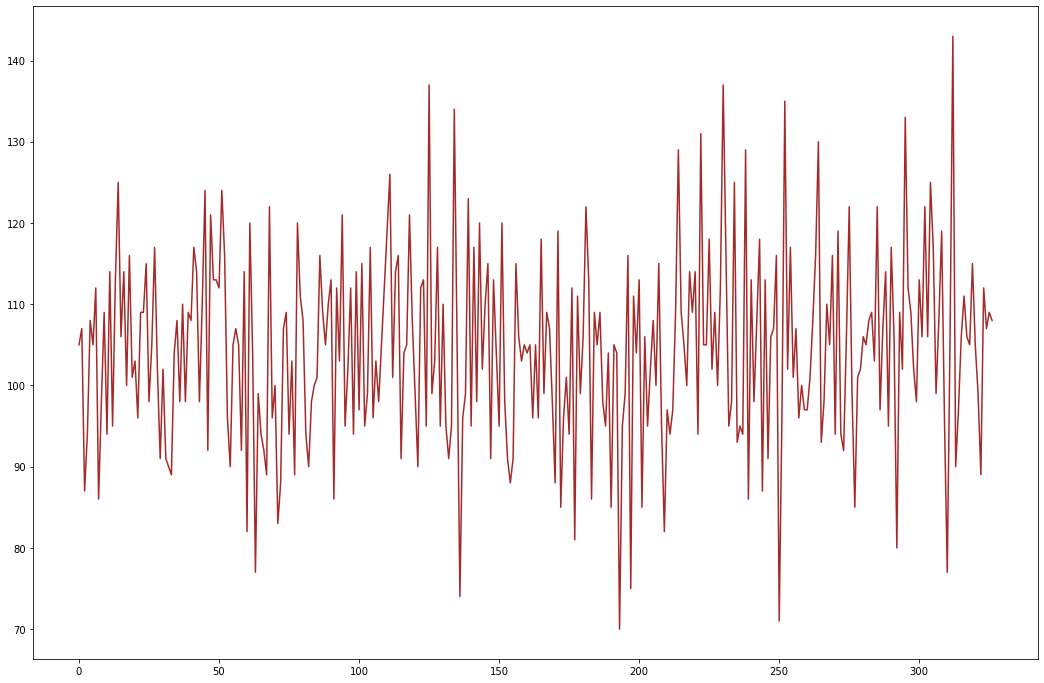

In [95]:
yTestReset = pd.DataFrame(yTest).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset,color="brown")
plt.show()

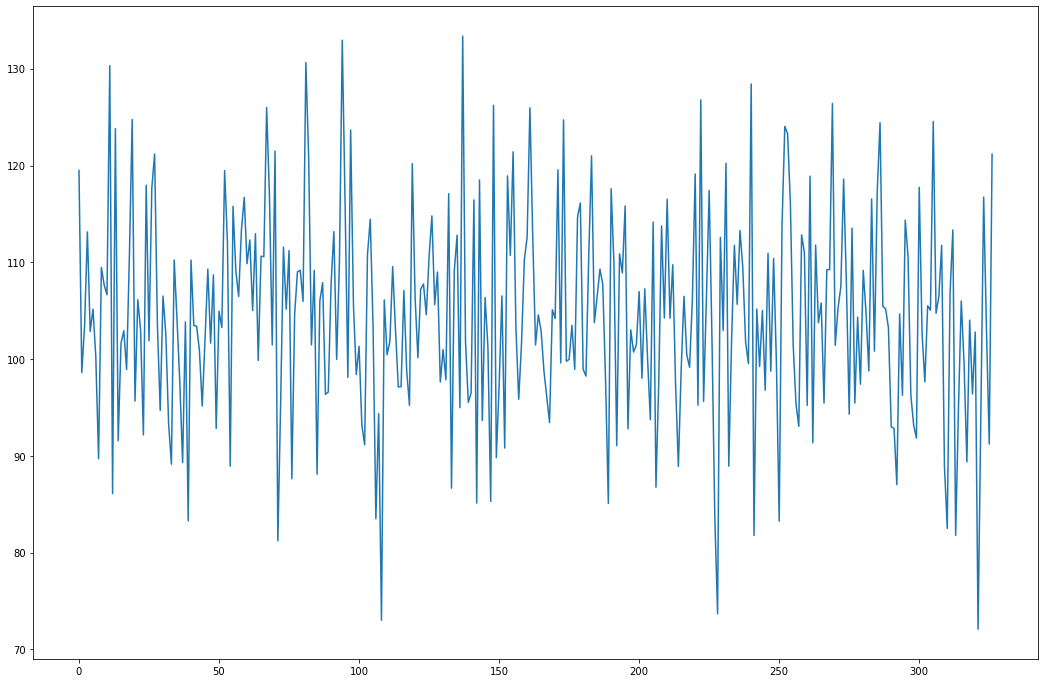

In [96]:
yPredictReset = pd.DataFrame(yPredict).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yPredictReset.index,yPredictReset[0])
plt.show()

### Superimpose

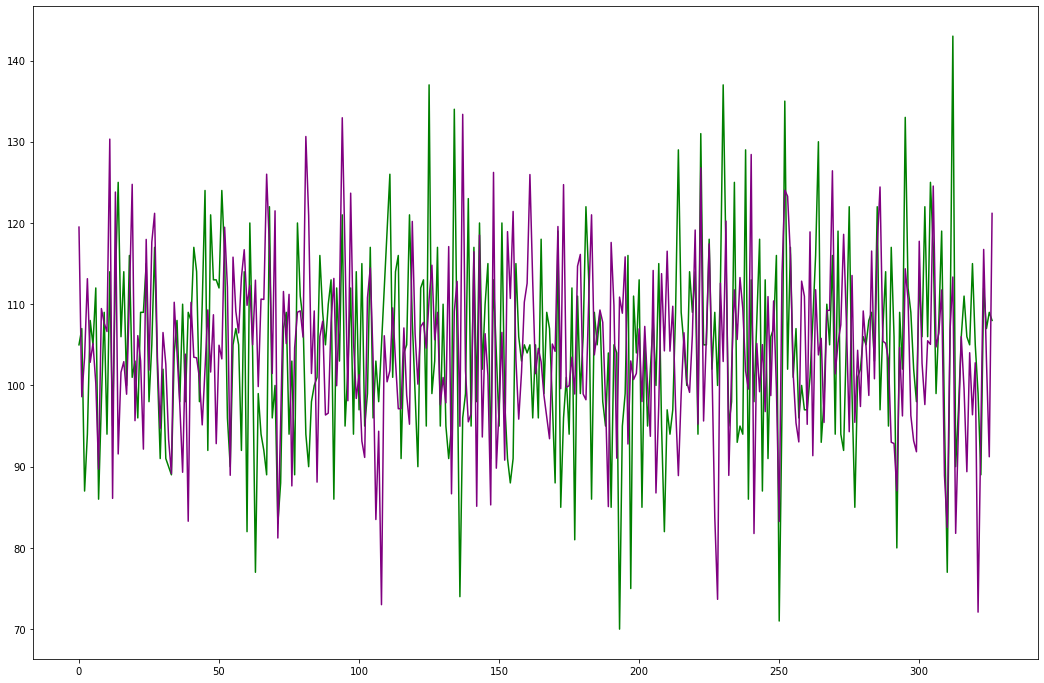

In [97]:
plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset["team1 final score"],color="green")
plt.plot(yPredictReset.index,yPredictReset[0],color="purple")
plt.show()

### Percentage off

In [98]:
convNumpyYTestReset = np.array(yTestReset)
percentOff = ((convNumpyYTestReset - yPredictReset) / (convNumpyYTestReset + 0.0001)) * 100

pd.DataFrame(percentOff).sample(51)

,0
95,-22.321601
74,3.528193
211,-10.874359
37,18.808736
189,18.187579
85,12.773618
282,8.546560
100,-4.455255
171,-0.472368
165,12.786285


In [99]:
dfPredict["residual"] = dfPredict["yTest"] - dfPredict["yPredict"]
dfPredict["percentage difference"] = np.absolute((dfPredict["residual"] / (dfPredict["yTest"])) * 100)
dfPredict.head(45)

,yTest,yPredict,residual,percentage difference
876,105,119.489487,-14.489487,13.799511
603,107,98.608543,8.391457,7.842483
446,87,103.434952,-16.434952,18.890749
726,94,113.140892,-19.140892,20.362651
551,108,102.847130,5.152870,4.771176
280,105,105.166786,-0.166786,0.158844
168,112,100.291580,11.708420,10.453946
1219,86,89.710060,-3.710060,4.314023
1176,98,109.464684,-11.464684,11.698657
273,109,107.655281,1.344719,1.233687


In [100]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 11.223198473635799
mean squared error (team1 final score): 206.02739963217158


### Convert to dmatrix data structure

In [101]:
dataDMatrix = xgb.DMatrix(data=dfFilterNba[features],label=dfFilterNba["team1 final score"])
dataDMatrix

In [102]:
params = {"booster": "gbtree","objective":"reg:squarederror","learning_rate": 0.9111,
    'max_depth': 6,"alpha": 1,"n_estimators": 211,"reg_lambda": 0.09999,"reg_alpha": 2.2222}

In [103]:
crossValResults = xgb.cv(dtrain=dataDMatrix,params=params,nfold=12,
    num_boost_round=25,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=122)
crossValResults.head()

[20:37:34] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:37:34] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:37:34] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.222633,0.073460,14.684197,0.504785
1,9.719580,0.150661,11.965254,0.682773


In [104]:
dtrain = xgb.DMatrix(xTrain[features],label=yTrain)
dtest = xgb.DMatrix(xTest[features],label=yTest)

In [105]:
parameter = {'max_depth': 6,'eta': 0.3333,"booster": "gbtree","verbose": True,"n_estimators": 122,"learning_rate": 0.9111,
    "objective": "reg:squarederror","alpha": 10,"reg_alpha":2.2222}
parameter["nthread"] = 4
parameter['eval_metric'] = ["auc","logloss","ams@0"]

evallist = [(dtest,"eval"),(dtrain,"train")]

In [106]:
num_round = 17
bst = xgb.train(parameter,dtrain,num_round,evallist)

[20:37:36] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:37:36] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[20:37:36] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[0]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:30.76110	train-auc:nan	train-logloss:-3794.32080	train-ams@0:61.56797
[20:37:36] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[20:37:36] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[1]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:41.34926	train-auc:nan	train-logloss:-3794.32080	train-ams@0:84.43428
[20:37:36] WARNIN

In [107]:
yPredict1 = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
pd.DataFrame(yPredict1).head(50)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,0
0,111.103104
1,91.948158
2,110.537743
3,102.434669
4,100.950058
5,104.338997
6,98.487213
7,102.906990
8,99.257553
9,104.280136


### Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

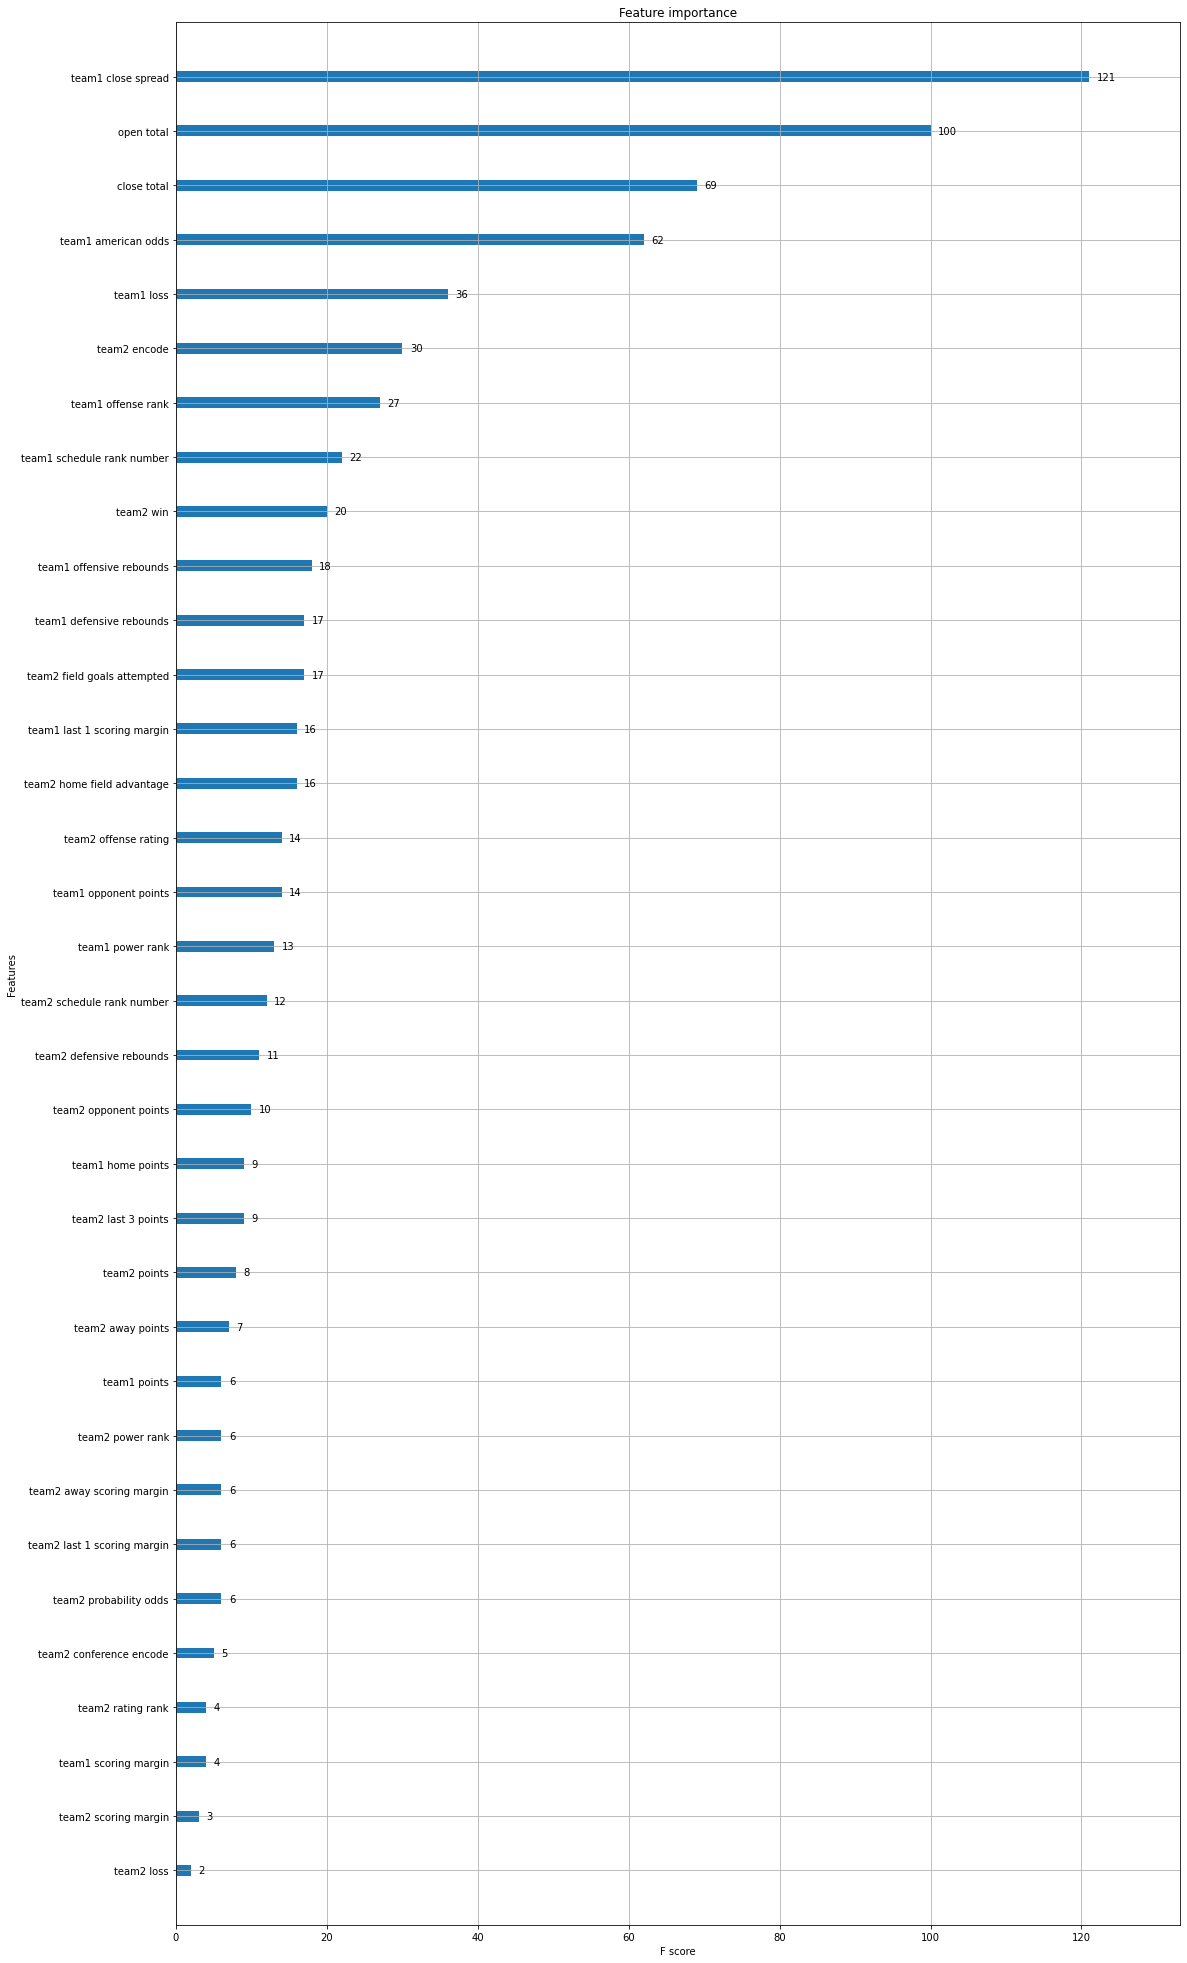

In [108]:
fig,ax = plt.subplots(1,1,figsize=(18,35))
xgb.plot_importance(bst,ax=ax)

### SHAP (shapley additive explanations)

In [109]:
treeExplainer = shap.TreeExplainer(XGBRegressor,model_output="raw",feature_perturbation="interventional",
    data=pd.DataFrame(xTest).head(100),algorithm="deep")

In [110]:
shapValues = treeExplainer.shap_values(pd.DataFrame(xTest).iloc[:327,:])
shapValues

array([[-0.73426812,  3.51790666,  0.        , ..., -0.0731868 ,
         0.        ,  0.24730893],
       [-0.27951406,  4.00139483,  0.        , ...,  0.99170801,
         0.        ,  0.24629092],
       [-0.40027531,  4.72400064,  0.        , ..., -0.0717843 ,
         0.        ,  0.24760926],
       ...,
       [-1.78669131,  3.72342262,  0.        , ..., -0.0731868 ,
         0.        ,  0.25010393],
       [-1.91223897, -7.9456682 ,  0.        , ..., -0.94700454,
         0.        ,  0.26293827],
       [-1.22042716,  5.29157647,  0.        , ..., -0.0717843 ,
         0.        ,  0.25010393]])

In [111]:
shapValuesList = []
for i in shapValues:
    convListShapValues = i.tolist()
    shapValuesList.append(convListShapValues)
    
dfShapValues = pd.DataFrame(shapValuesList)
dfShapValues.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.734268,3.517907,0.0,0.0,0.0,0.0,0.013426,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.265707,-1.500693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037149,0.873353,-0.073187,0.0,0.247309
1,-0.279514,4.001395,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.059826,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,6.181170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.095489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034463,0.041202,0.991708,0.0,0.246291
2,-0.400275,4.724001,0.0,0.0,0.0,0.0,0.013426,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,0.384928,5.062920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065231,-0.193563,-0.071784,0.0,0.247609
3,-1.737540,2.428355,0.0,0.0,0.0,0.0,0.008309,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,0.384928,-1.767899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033826,-0.326186,1.018120,0.0,0.246291
4,-1.250360,5.297642,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,6.181170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034463,0.041202,-0.304539,0.0,0.246291
5,1.077958,-2.378381,0.0,0.0,0.0,0.0,0.009780,-0.351160,-0.064560,0.0,0.0,0.0,0.0,0.0,0.0,-0.261637,1.254827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.327119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.247275,-0.082934,-0.922792,0.0,0.263643
6,-1.763475,5.588449,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,6.720887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021169,-0.377379,-0.073446,0.0,0.250104
7,-1.775889,3.723423,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,-1.764499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016376,-0.326186,-0.074018,0.0,0.250104
8,-1.775889,3.723423,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,-1.764499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016376,-0.326186,-0.074018,0.0,0.250104
9,-1.775889,3.723423,0.0,0.0,0.0,0.0,-0.002891,0.032666,-0.146823,0.0,0.0,0.0,0.0,0.0,0.0,-0.258240,-1.764499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.546342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016376,-0.326186,-0.074018,0.0,0.250104


In [112]:
shap.initjs()

In [113]:
shap.force_plot(treeExplainer.expected_value,shapValues[4],pd.DataFrame(xTest).iloc[5:6,])


In [114]:
shap.force_plot(treeExplainer.expected_value,shapValues[27],pd.DataFrame(xTest).iloc[28:29,])


In [115]:
shap.force_plot(treeExplainer.expected_value,shapValues[55],pd.DataFrame(xTest).iloc[56:57])


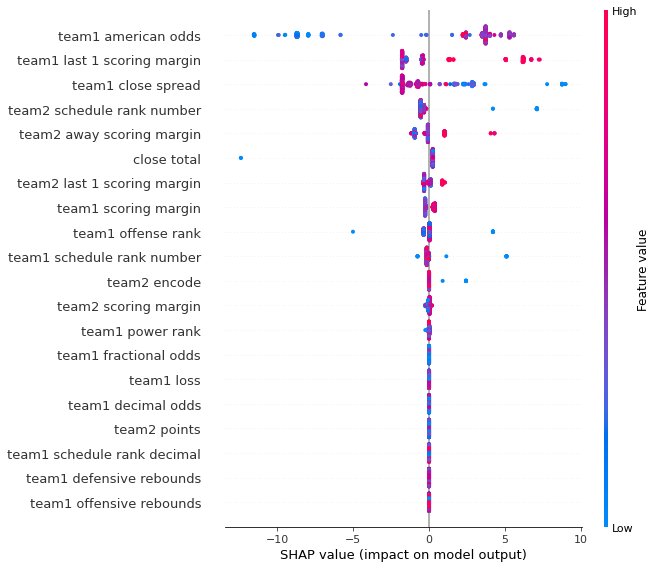

In [116]:
shap.summary_plot(shapValues,xTest[0:327])

### Compute SHAP values

In [117]:
explainer = shap.Explainer(XGBRegressor.predict,xTrain[:100])
explainShapValues = explainer(xTrain[:50])

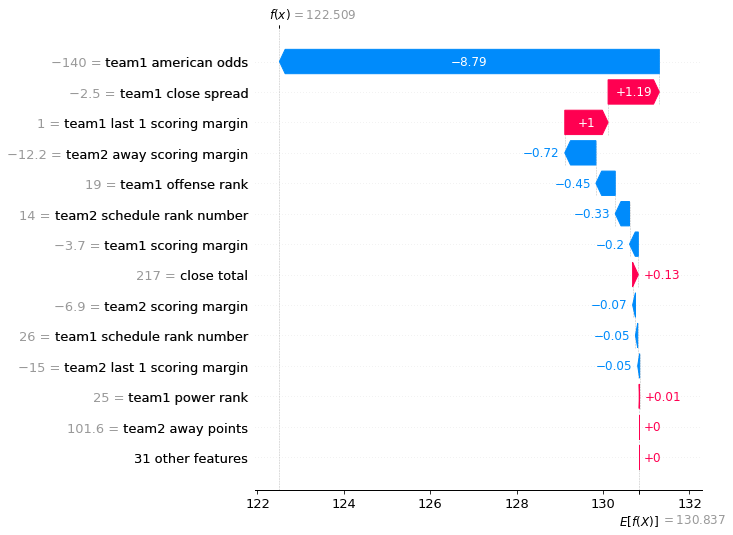

In [118]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explainShapValues[13],max_display=14)

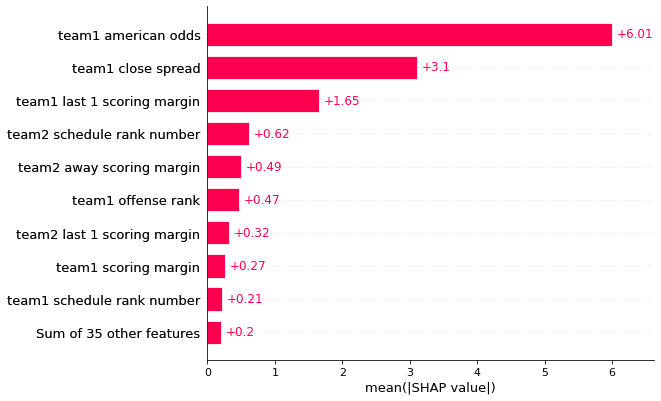

In [119]:
shap.plots.bar(explainShapValues)

### Statsmodels

In [125]:
feat = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

dropFeat = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 offense rank',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']


In [126]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[feat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [127]:
xInclCons = sm.add_constant(xTrain)
# ordinary least squares
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))          
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.667
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.95e-28
Time:                        20:38:01   Log-Likelihood:                -3696.1
No. Observations:                 980   AIC:                             7534.
Df Residuals:                     909   BIC:                             7881.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
team1 encode                      -0.0231      0.181     -0.127      0.899      -0.378       0.332
team1 ha encode                -1.238e-09   1.34e-09     -0.923      0.356   -3.87e-09    1.39e-09
team1 open spread                 -0.0157      0.129     -0.122      0.903      -0.268       0.237
team1 close spread                -0.1096      0.134     -0.819      0.413      -0.372       0.153
team1 american odds               -0.0061      0.007     -0.850      0.396      -0.020       0.008
team1 probability odds             0.5934      0.704      0.843      0.399      -0.788       1.974
team1 decimal odds              -258.5241    204.979     -1.261      0.208    -660.812     143.764
team1 fractional odds            259.5266    205.036      1.266      0.206    -142.872     661.925
team1 win                          0.2511      0.565      0.445      0.657      -0.857       1.359
team1 loss                         1.1292      1.525      0.741      0.459      -1.863       4.122
team1 record rating               -4.8740      6.749     -0.722      0.470     -18.119       8.371
team1 rating rank                 -0.0096      0.789     -0.012      0.990      -1.558       1.539
team1 rating rating               -1.1603     14.063     -0.083      0.934     -28.761      26.440
team1 power rank                  -0.4673      1.123     -0.416      0.677      -2.672       1.737
team1 power rating                -0.9258      2.682     -0.345      0.730      -6.189       4.337
team1 offense rank                 0.3264      0.394      0.829      0.407      -0.446       1.099
team1 offense rating              -0.9384      4.299     -0.218      0.827      -9.376       7.499
team1 defense rank                -0.2679      0.707     -0.379      0.705      -1.655       1.119
team1 defense rating              -0.6388      3.054     -0.209      0.834      -6.633       5.355
team1 home field advantage        -3.0715      3.628     -0.847      0.397     -10.191       4.048
team1 schedule rank number         1.0440      1.235      0.845      0.398      -1.380       3.468
team1 schedule rank decimal       21.3631     26.163      0.817      0.414     -29.984      72.710
team1 conference encode            0.5510      1.059      0.520      0.603      -1.528       2.630
team1 assists                      0.7569      1.014      0.747      0.456      -1.233       2.747
team1 defensive rebounds           1.1298      2.108      0.536      0.592      -3.008       5.267
team1 field goals attempted        0.1513      0.647      0.234      0.815      -1.118       1.421
team1 fouls                        0.0605      0.702      0.086      0.931      -1.318       1.439
team1 offensive rebounds          -0.5674      1.059     -0.536      0.592      -2.646       1.512
team1 opponent

In [128]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
team1 encode,-2.305159e-02,0.8986
team1 ha encode,-1.237943e-09,0.3560
team1 open spread,-1.566596e-02,0.9031
team1 close spread,-1.096191e-01,0.4131
team1 american odds,-6.110944e-03,0.3958
team1 probability odds,5.933646e-01,0.3993
team1 decimal odds,-2.585241e+02,0.2076
team1 fractional odds,2.595266e+02,0.2059
team1 win,2.510591e-01,0.6566
team1 loss,1.129232e+00,0.4592


In [129]:
pValueSeries = pValues.p_value
pd.DataFrame(pValueSeries).head(70)

,p_value
team1 encode,0.8986
team1 ha encode,0.3560
team1 open spread,0.9031
team1 close spread,0.4131
team1 american odds,0.3958
team1 probability odds,0.3993
team1 decimal odds,0.2076
team1 fractional odds,0.2059
team1 win,0.6566
team1 loss,0.4592


### Features improvement

In [130]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[dropFeat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [131]:
xInclCons = sm.add_constant(xTrain)
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))   # ordinary least square
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     7.740
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.61e-38
Time:                        20:38:03   Log-Likelihood:                -3697.5
No. Observations:                 980   AIC:                             7483.
Df Residuals:                     936   BIC:                             7698.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         101.6441    293.004      0.347      0.729    -473.377     676.665
team1 close spread             -0.1274      0.039     -3.271      0.001      -0.204      -0.051
team1 american odds            -0.0066      0.007     -0.953      0.341      -0.020       0.007
team1 probability odds          0.5336      0.683      0.781      0.435      -0.807       1.874
team1 decimal odds           -256.0193    199.141     -1.286      0.199    -646.834     134.796
team1 fractional odds         256.8976    199.193      1.290      0.197    -134.020     647.815
team1 loss                      0.2920      0.219      1.331      0.184      -0.139       0.723
team1 power rank               -0.1028      0.136     -0.757      0.449      -0.369       0.164
team1 offense rank              0.1107      0.128      0.864      0.388      -0.141       0.362
team1 schedule rank number      0.1233      0.324      0.381      0.703      -0.512       0.759
team1 schedule rank decimal     2.3347      6.169      0.378      0.705      -9.772      14.441
team1 defensive rebounds        0.2810      0.338      0.832      0.406      -0.382       0.944
team1 offensive rebounds       -0.1508      0.318     -0.474      0.636      -0.775       0.474
team1 opponent points           6.4156      8.451      0.759      0.448     -10.170      23.001
team1 points                   -4.3183      8.365     -0.516      0.606     -20.735      12.099
team1 home points              -1.3134      0.344     -3.814      0.000      -1.989      -0.638
team1 scoring margin            6.8486      8.343      0.821      0.412      -9.525      23.222
team1 last 1 scoring margin     0.0446      0.031      1.415      0.157      -0.017       0.106
team2 encode                    0.0715      0.070      1.028      0.304      -0.065       0.208
team2 close spread              0.1274      0.039      3.271      0.001       0.051       0.204
team2 probability odds          0.4711      0.686      0.687      0.492      -0.875       1.817
team2 decimal odds            111.6200    149.078      0.749      0.454    -180.945     404.185
team2 fractional odds        -113.5056    149.070     -0.761      0.447    -406.056     179.045
team2 win                      -0.3094      0.353     -0.877      0.381      -1.002       0.383
team2 loss                     -0.7457      0.649     -1.150      0.251      -2.018       0.527
team2 rating rank              -0.6016      0.607     -0.991      0.322      -1.793       0.589
team2 rating rating            -7.0104      6.929     -1.012      0.312     -20.608       6.587
team2 power rank                0.5337      0.656      0.814      0.416      -0.753       1.820
team2 power rating              1.1831      1.599      0.740      0.460      -1.955       4.321
team2 offen

In [132]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
const,101.644100,0.7287
team1 close spread,-0.127379,0.0011
team1 american odds,-0.006590,0.3411
team1 probability odds,0.533648,0.4349
team1 decimal odds,-256.019258,0.1989
team1 fractional odds,256.897605,0.1975
team1 loss,0.292014,0.1837
team1 power rank,-0.102788,0.4491
team1 offense rank,0.110722,0.3879
team1 schedule rank number,0.123258,0.7035


### Seaborn

In [133]:
import seaborn as sns
sns.set()

### Differences between prediction and true target

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Residuals')

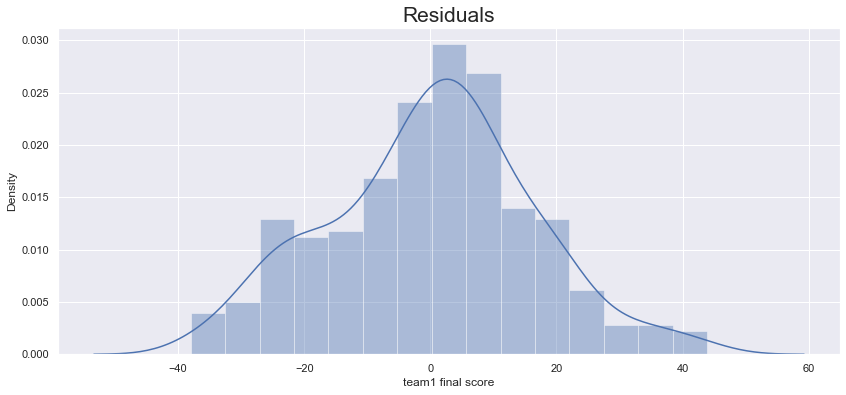

In [134]:
sns.set(rc={"figure.figsize":(14,6)})
sns.distplot(yTest - yPredict)
plt.title("Residuals",size=21)